# Fourier decomposition and cubic spline fits of arterial waveform

Please read and only use the data under the terms of the [VitalDB Data Use Agreement](https://vitaldb.net/dataset/?query=overview&documentId=13qqajnNZzkN7NZ9aXnaQ-47NWy7kx-a6gbrcEsi-gak&sectionId=h.usmoena3l4rb)

In [29]:
import os, sys
sys.path.append(os.pardir)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.fft import fft
from scipy.interpolate import interp1d
import statsmodels.formula.api as smf

from sidewinder.waveforms import Waveforms

In [30]:
waveforms = pd.read_csv(
    os.path.join(
        os.pardir, 'local_data', 'abp_waveform_extract.csv'),
        index_col=0
)
art = waveforms['SNUADC/ART'].values[100205:101980]

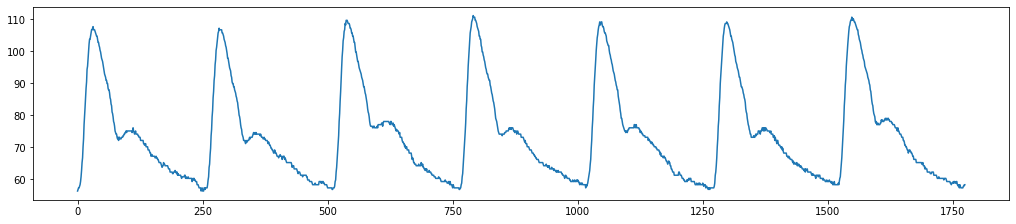

In [31]:
fig, ax = plt.subplots(figsize=(14, 3), constrained_layout=True)
ax.plot(art)
plt.show()

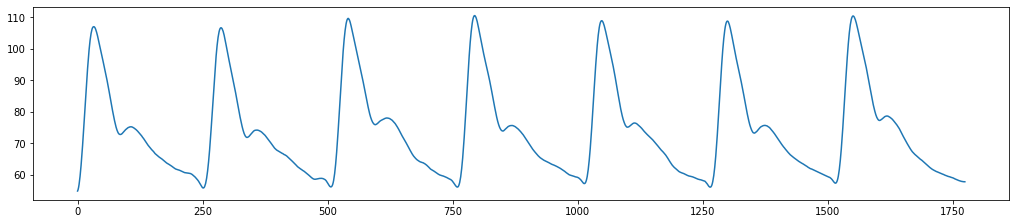

In [32]:
art_smooth = savgol_filter(art, window_length=39, polyorder=3)

fig, ax = plt.subplots(figsize=(14, 3), constrained_layout=True)
ax.plot(art_smooth)
plt.show()

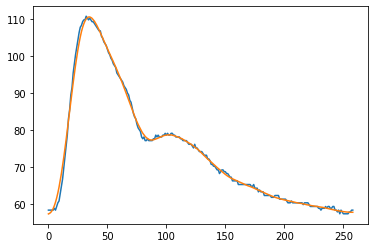

In [33]:
beat = art[1516:]
smooth_beat = art_smooth[1516:]
plt.plot(beat)
plt.plot(smooth_beat)

In [34]:
smooth_beat_scaled = smooth_beat - smooth_beat.min()
smooth_beat_scaled /= smooth_beat_scaled.max()

                         QuantReg Regression Results                          
Dep. Variable:                   beat   Pseudo R-squared:               0.9988
Model:                       QuantReg   Bandwidth:                   0.0001705
Method:                 Least Squares   Sparsity:                    0.0005078
Date:                Mon, 10 Jan 2022   No. Observations:                  259
Time:                        19:37:24   Df Residuals:                      209
                                        Df Model:                           49
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3142   1.55e-05   2.03e+04      0.000       0.314       0.314
cc(x, df=50)[0]     -0.3059      0.000  -2788.892      0.000      -0.306      -0.306
cc(x, df=50)[1]     -0.2704      0.000  -2229.448      0.000      -0.271      -0.270
cc(x, df=50)[2]     -0

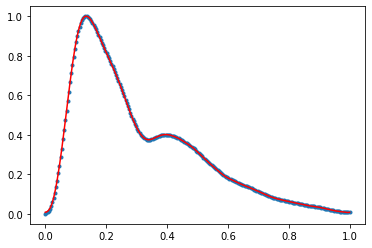

In [40]:
x = np.linspace(0, 1, beat.size)

mod = smf.quantreg('beat ~ cc(x, df=50)', dict(x=x, beat=smooth_beat_scaled))
# res = mod.fit(q=0.000001)
res = mod.fit()
print(res.summary())

plt.plot(x, smooth_beat_scaled, '.')
plt.plot(x, res.predict(), 'r')
plt.show()

In [41]:
cyclic_beat = res.predict()

In [42]:
scaled_abp_waveform = interp1d(x, res.predict(), kind='cubic')

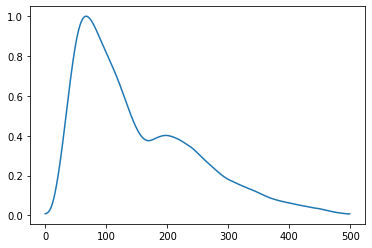

In [43]:
plt.plot(scaled_abp_waveform(np.linspace(0, 1, 500)))

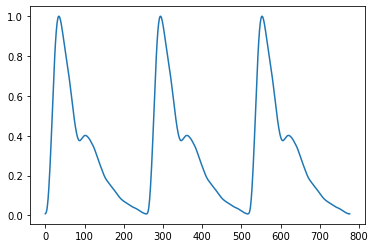

In [44]:
plt.plot(np.tile(cyclic_beat, 3))

## Old code

In [ ]:
# rft = np.fft.rfft(art_smooth)
# rft[80:] = 0

# fig, ax = plt.subplots(figsize=(14, 3), constrained_layout=True)
# ax.plot(art_smooth)
# ax.plot(np.fft.irfft(rft))
# plt.show()